In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

In [35]:
# Snowball Algorithm, convert words to the stem
stemmer = SnowballStemmer('english')

In [36]:
# Read the data
df_train = pd.read_csv('../data/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('../data/test.csv', encoding="ISO-8859-1")
df_attr = pd.read_csv('../data/attributes.csv')
df_pro_desc = pd.read_csv('../data/product_descriptions.csv')

In [37]:
# Number of rows in the file
num_train = df_train.shape[0]

In [38]:
# Stack the data.frame on top of each other 
# [rbind] axis=0 is vertical, [cbind] axis=1 is horizontal (c)
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

In [39]:
# Merge data.frame [pretty straight forward]
# left is focused on df_all
df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')

In [40]:
# Not sure what these functions do.
# Example: (angle bracket)
# angle -> angl, bracket -> bracket
# join the two stems by " "
# similar to paste(stem1, stem2, sep=" ")
def str_stemmer(s):
	return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [41]:
df_all['search_term'] = df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))

In [42]:
# astype converts the data into the form inside (np.int64)
# len(x.split()) counts the number of terms
df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

In [43]:
# paste 3 text information, not sure how \t fits in
df_all['product_info'] = df_all['search_term']+"\t"+df_all['product_title']+"\t"+df_all['product_description']

In [44]:
# str2.find(word) finds the location of where the text is located in str2
# For example "abcde".find("cd") will result 2
# if the string is not in, "abcde".find("z") will result -1
# int(str2.find(word) >= 0) checks if the char is in the string 1 for true 0 for false
def str_common_word(str1, str2):
	return sum(int(str2.find(word)>=0) for word in str1.split())

def word_len(word, str2):
    if str2.find(word)>=0:
        return len(word)
    else:
        return 0

def str_common_word_len(str1, str2):
	return sum(word_len(word, str2) for word in str1.split())

In [45]:
df_all['word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

In [46]:
df_all['word_in_title_len'] = df_all['product_info'].map(lambda x:str_common_word_len(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description_len'] = df_all['product_info'].map(lambda x:str_common_word_len(x.split('\t')[0],x.split('\t')[2]))

In [14]:
# remove columns in the data.frame but axis=1 (this is a must)
# remove rows axis=1 or default
df_all = df_all.drop(['search_term','product_title','product_description','product_info'],axis=1)

In [15]:
# split data.frame to train and test
# :num_train, this is splitting the rbind back again
df_train = df_all.iloc[:num_train]
df_test = df_all.iloc[num_train:]
id_test = df_test['id']

In [16]:
# Split independent, dependent variable (target variable)
# convert pandas.dataframe with values
y_train = df_train['relevance'].values
# remove two variables ['id','relevance']
X_train = df_train.drop(['id','relevance'],axis=1).values
X_test = df_test.drop(['id','relevance'],axis=1).values

In [47]:
# Train RandomForest and Bagging the results
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [48]:
# Build data.frame and save the results
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

In [17]:
# What could be done?
# use attributes for building other features
# how does N-Fold Cross Validataion work in python? Is ther something like [caret]
# Try other models


,id,product_uid,relevance,len_of_query,word_in_title,word_in_description
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2
5,18,100006,3.00,2,1,2
6,20,100006,2.67,3,2,2
7,21,100006,3.00,1,1,1
8,23,100007,2.67,2,2,2
9,27,100009,3.00,2,2,2


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

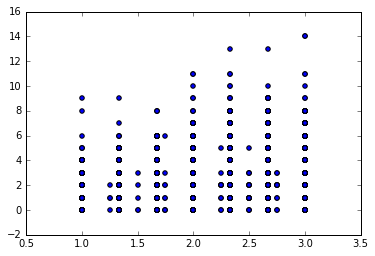

In [25]:
df_train.head(3)
plt.scatter(df_train.relevance, df_train.word_in_description)

In [33]:
df_train.head(10)

,id,product_uid,relevance,len_of_query,word_in_title,word_in_description
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2
5,18,100006,3.00,2,1,2
6,20,100006,2.67,3,2,2
7,21,100006,3.00,1,1,1
8,23,100007,2.67,2,2,2
9,27,100009,3.00,2,2,2
